## 1.1: Importing Libraries & Helper Functions

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline
#tf.logging.set_verbosity(tf.logging.ERROR)

print('Libraries imported.')

Libraries imported.


# 2: Importing the Data

## 2.1: Importing the Data

In [2]:
df = pd.read_csv('data.csv', names = column_names)
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


## 2.2: Check Missing Data


In [3]:
df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

# 3: Data Normalization

## 3.1: Data Normalization

In [4]:
df = df.iloc[:,1:]
df_norm = (df-df.mean())/df.std()
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


## 3.2: Convert Label Value

In [5]:
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_value(pred):
    return int(pred * y_std + y_mean)

#  4: Create Training and Test Sets

## 4.1: Select Features

In [6]:
x = df_norm.drop( columns=['price'] )
x.head()

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


## 4.2: Select Labels

In [7]:
y = df_norm['price']
y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

## 4.3: Feature and Label Values

In [8]:
x_arr = x.values
y_arr = y.values
y_arr = y_arr.reshape(5000,1)

print('x:',x_arr.shape)
print('y:',y_arr.shape)

x: (5000, 6)
y: (5000, 1)


## 4.4: Train and Test Split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

print('training set:',x_train.shape,y_train.shape)
print('test set:',x_test.shape,y_test.shape)

training set: (4250, 6) (4250,)
test set: (750, 6) (750,)


# 5: Create the Model

## 5.1: Create the Model

In [10]:
def get_model():
    model = Sequential([
        Dense(10, input_shape=(6,), activation='relu'),
        Dense(20, activation='relu'),
        Dense(6, activation='relu'),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam')
    return model

get_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                70        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 126       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 423
Trainable params: 423
Non-trainable params: 0
_________________________________________________________________


# 6: Model Training

## 6.1: Model Training

In [11]:
es_cb = EarlyStopping(monitor='val_loss', patience=20)

model = get_model()
pred_on_untrained = model.predict(x_test)

history = model.fit(
    x_train, y_train,
    validation_data = (x_test,y_test),
    epochs = 100,
    callbacks = [es_cb]
    )

Epoch 1/100
133/133 [==============================] - 0s 1ms/step - loss: 0.6275 - val_loss: 0.2966
Epoch 2/100
133/133 [==============================] - 0s 663us/step - loss: 0.2455 - val_loss: 0.2052
Epoch 3/100
133/133 [==============================] - 0s 671us/step - loss: 0.1925 - val_loss: 0.1803
Epoch 4/100
133/133 [==============================] - 0s 655us/step - loss: 0.1753 - val_loss: 0.1719
Epoch 5/100
133/133 [==============================] - 0s 655us/step - loss: 0.1681 - val_loss: 0.1697
Epoch 6/100
133/133 [==============================] - 0s 660us/step - loss: 0.1640 - val_loss: 0.1654
Epoch 7/100
133/133 [==============================] - 0s 660us/step - loss: 0.1613 - val_loss: 0.1639
Epoch 8/100
133/133 [==============================] - 0s 653us/step - loss: 0.1582 - val_loss: 0.1621
Epoch 9/100
133/133 [==============================] - 0s 660us/step - loss: 0.1572 - val_loss: 0.1616
Epoch 10/100
133/133 [==============================] - 0s 658us/step - los

## 6.2: Plot Training and Validation Loss

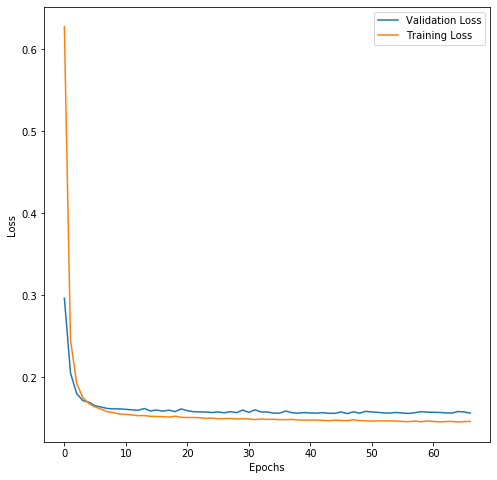

In [12]:
plot_loss(history)

# 7: Predictions

## 7.1: Plot Raw Predictions

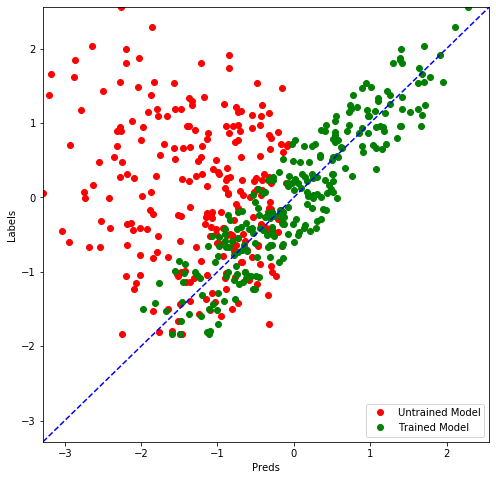

In [29]:
pred_on_trained = model.predict(x_test)
compare_predictions(pred_on_untrained, pred_on_trained, y_test)

## 7.2: Plot Price Predictions

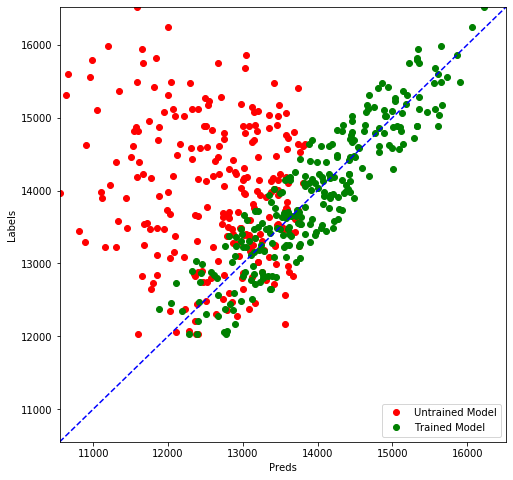

In [31]:
price_untrained = [convert_label_value(y) for y in pred_on_untrained]
price_trained = [convert_label_value(y) for y in pred_on_trained]
price_test = [convert_label_value(y) for y in y_test]

compare_predictions(price_untrained, price_trained, price_test)